<table  class="blueTable">
        <tr>
            <th>
            Thème 7 : Algorithmique
            </th>
        </tr>
</table>
<br>
<table  class="blueTable">
        <tr >
            <th width="20%"; style="background-color: #3B444B;color:white;text-align:center;border:none;font-size:40pt;">
            22 bis
            </th>
            <th  width="80%"; style="text-align:center;border:none;font-size:25pt;">Les algorithmes gloutons - Exercices</th>
        </tr>
</table>
<br>


## Exercice n°1 :  Les rats de bibliothèque

On suppose que $2\times n$ manuscrits précieux ont été alignés sur une étagère. Deux rats de bibliothèque R1 et R2 décident de sélectionner chacun un manuscrit à tour de rôle en commençant par R1, jusqu’à ce qu’il n’en reste plus. Le manuscrit sélectionné doit être à l’une des deux extrémités de la rangée.

La valeur des manuscrits est donnée de gauche à droite par le tableau $v$. Par exemple : $v=[1.2, 4.2, 80, 5]$. On suppose que chacun cherche uniquement à remporter une plus grande valeur totale que l’autre et pas forcément à remporter la plus grande valeur possible.

a) Le critère glouton « prendre le plus précieux des 2 manuscrits » donne-t-il une stratégie gagnante pour R1 ?


b) Compléter le programme `resultats_gloutons` affichant ce que remportent R1 et R2 en adoptant tous deux ce critère glouton, et calculant ensuite une stratégie gagnante de R1.

In [1]:
def resultats_gloutons(v):
    """
    Entree: un tableau de longueur paire: la valeur des manuscrits.
    Affiche les objets et la valeur totale obtenus par R1 et R2 en jouant chacun la strategie gloutonne.
    Renvoie les objets obtenus par R1 et ceux obtenus par R2.
    """
    assert(len(v)%2==0)
    n = len(v)//2
    total_1 = 0
    total_2 = 0
    objets_1 = [None]*n
    objets_2 = [None]*n
    i_debut = 0
    i_fin = len(v)-1
    for i in range(n):
        # On effectue 2 etapes d'un coup: celle de 1 et de 2
        # Etape de 1:
        if v[i_debut] > v[i_fin]:
            objets_1[i] = v[i_debut]
            i_debut = i_debut + 1
        else:
            objets_1[i] = v[i_fin]
            i_fin = i_fin - 1
        # Etape de 2:
        if v[i_debut] > v[i_fin]:
            objets_2[i] = v[i_debut]
            i_debut = i_debut + 1
        else:
            objets_2[i] = v[i_fin]
            i_fin = i_fin - 1
    print(f'R1 va obtenir {sum(objets_1)} avec les objets {objets_1}')
    print(f'R2 va obtenir {sum(objets_2)} avec les objets {objets_2}')
    return objets_1,objets_2

# Test :
print(resultats_gloutons([1.2,4.2,80,5])==([5, 4.2], [80, 1.2]))

R1 va obtenir 9.2 avec les objets [5, 4.2]
R2 va obtenir 81.2 avec les objets [80, 1.2]
True


In [2]:
def valeur_R1(v):
    """
    Entree: un tableau de longueur paire: la valeur des manuscrits.
    Renvoie les objets et la valeur total obtenus par R1 en jouant la strategie pairs_ou_impairs.
    (en supposant que R2 choisit aussi cette stratégie)
    """
    assert(len(v)%2 == 0)
    n = len(v)//2
    total_pair = 0 # total des valeurs a des indices pairs
    total_impair = 0 # total des valeurs a des indices impairs
    objets_pairs = [None]*n
    objets_impairs = [None]*n
    for i in range(n): # on traite 2 par 2 les cases de v
        total_pair = total_pair + v[2*i]
        objets_pairs[i] = v[2*i]
        total_impair = v[2*i+1]
        objets_impairs = v[2*i+1]
    if total_pair > total_impair :
        return objets_pairs, total_pair
    else:
        return objets_impairs, total_impair

print("objets et total qu'obtient R1 en jouant la strategie pair/impair :",valeur_R1([1.2,4.2,80,5])) 

# Test:
print(valeur_R1([1.2,4.2,80,5])==([1.2, 80], 81.2))

objets et total qu'obtient R1 en jouant la strategie pair/impair : ([1.2, 80], 81.2)
True


## Exercie n°2 : Lotissement

Soit $v$ une liste de propriétés le long d’une rue. Chaque propriété a une valeur pouvant être négative. Un promoteur veut découper $v$ en autant de lots que possible mais en prenant soin que la somme des éléments dans chaque lot soit positive pour qu’il soit « vendable ». Un lot est défini comme un ensemble de propriétés successives. Tout objet doit apparaître dans un unique lot. Par exemple, pour les valeurs $[-2, -1, 1, 4, 2, 5, -6, 1]$, le premier lot contiendra les 4 premières propriétés (valeur $-2-1+1+4 \geq 0$), le suivant, une (valeur $2 \geq 0$), le dernier les 3 propriétés $[5, -6, 1]$.

Trouver un critère (algorithme) glouton qui résout le problème, puis compléter la fonction suivante :

In [3]:
def decompose(t):
    """
    Entree: t est un tableau de proprietes, données dans l'ordre le long d'une rue.
    ========
    On suppose que chaque propriete est un dictionnaire:
    {'nom': ..., 'valeur': ...}
    On suppose aussi (nécessairement) que la valeur totale de l'ensemble des propriétés le long de la rue est positive,
    sinon il n'y a pas de solution.
    ========
    Renvoie: la liste des lots (tableau de tableau de proprietes).
    """
    assert(sum([x['valeur'] for x in t])>=0)
    res = []
    lot = [] # proprietes depuis le lot precedent
    total = 0 # valeur totale depuis le lot precedent
    for j in range(len(t)):
        lot = lot + [t[j]]
        total = total + t[j]['valeur']
        if total >= 0:
            res = res + [lot]
            lot = []
            total = 0
    if total < 0: # les éléments dans le dernier lot ne forment pas un lot valide seuls.
        j = len(res)-1
        while total < 0:
            for x in res[j]:
                total = total + x['valeur']
            lot = res[j]+lot
            j = j-1
        return [res[i] for i in range(0,j+1)]+[lot]
    return res

# Test :
rue = [
{'nom':'dechetterie','valeur':-2},
{'nom':'ruine','valeur':-1},
{'nom':'etang','valeur':1},
{'nom':'villa','valeur':4},
{'nom':'champ','valeur':2},
{'nom':'manoir','valeur':5},
{'nom':'depotoir','valeur':-6},
{'nom':'parking','valeur':1}]

if decompose(rue) == [
[
{'nom': 'dechetterie', 'valeur': -2},
{'nom': 'ruine', 'valeur': -1},
{'nom': 'etang', 'valeur': 1},
{'nom': 'villa', 'valeur': 4}
],
[
{'nom': 'champ', 'valeur': 2}
],
[
{'nom': 'manoir', 'valeur': 5},
{'nom':'depotoir','valeur':-6},
{'nom':'parking','valeur':1}]] :
     print("Résultat correct sur le test")
else:
     print("Résultat incorrect")

Résultat correct sur le test


## Exercice n°3 : Emploi du temps

Une école doit organiser des cours. Chaque cours a une heure de début et de fin, et on ne peut pas faire deux cours simultanément dans une salle. L’école dispose de suffisamment de salles. Toute ouverture de salle a un coût mais il est le même pour un ou plusieurs cours.

a) En vous aidant de l’exemple ci-dessous, quel(s) critère(s) glouton(s) donne(nt) la stratégie optimale pour répartir les cours en minimisant le nombre de salles à ouvrir :

-   trier les cours par ordre croissant d’heure de début. On met le cours dans n’importe quelle salle disponible, et on ouvre une autre salle s’il n’y en a pas.

-   même stratégie mais en triant les cours par ordre croissant d’heure de fin.

Ex: (1,2) (1,3) (3,6) (2,7)


In [4]:
def optimise_salle(l):
    """
    On suppose chaque cours est represente par un dictionnaire {'debut': ..., 'fin': ...}
    On suppose qu'il y a au moins un cours.
    Renvoie un planning qui minimise le nb de salles.
    Le planning est un tableau de salles. 
    Chaque salle est un tableaux de seances de cours
    """
    def f(c):
        """ renvoie le debut du cours c"""
        return c['debut']
    seances = sorted(l, key=f)
    salles = [[seances[0]]]
    for i in range(1,len(seances)):
        j = 0
        while j < len(salles) and seances[i]['debut'] < salles[j][-1]['fin']:
            j = j+1
        if j == len(salles):
            salles.append([seances[i]]) 
        else:
            salles[j].append(seances[i])
    return salles

# Test :
liste_cours = [{'debut': 1, 'fin': 2}, 
{'debut': 1, 'fin': 3}, 
{'debut': 3, 'fin': 6},
{'debut': 2, 'fin': 7}]

print(optimise_salle(liste_cours)==
      [[{'debut': 1, 'fin': 2}, {'debut': 2, 'fin': 7}],
         [{'debut': 1, 'fin': 3}, {'debut': 3, 'fin': 6}]])

True


## Exercice n°4 :  La grenouille


![grenouille.png](data/grenouille.png)

Une grenouille souhaite traverser un étang de 20m de large en sautant sur des nénuphars. Les nénuphars forment une ligne perpendiculaire aux rives. Un tableau contient la distance de chaque nénuphar au bord de départ. Un saut ne peut pas excéder $1.1m$. Proposer un algorithme calculant le nombre minimal de sauts que la grenouille doit réaliser pour traverser, puis compléter la fonction suivante :
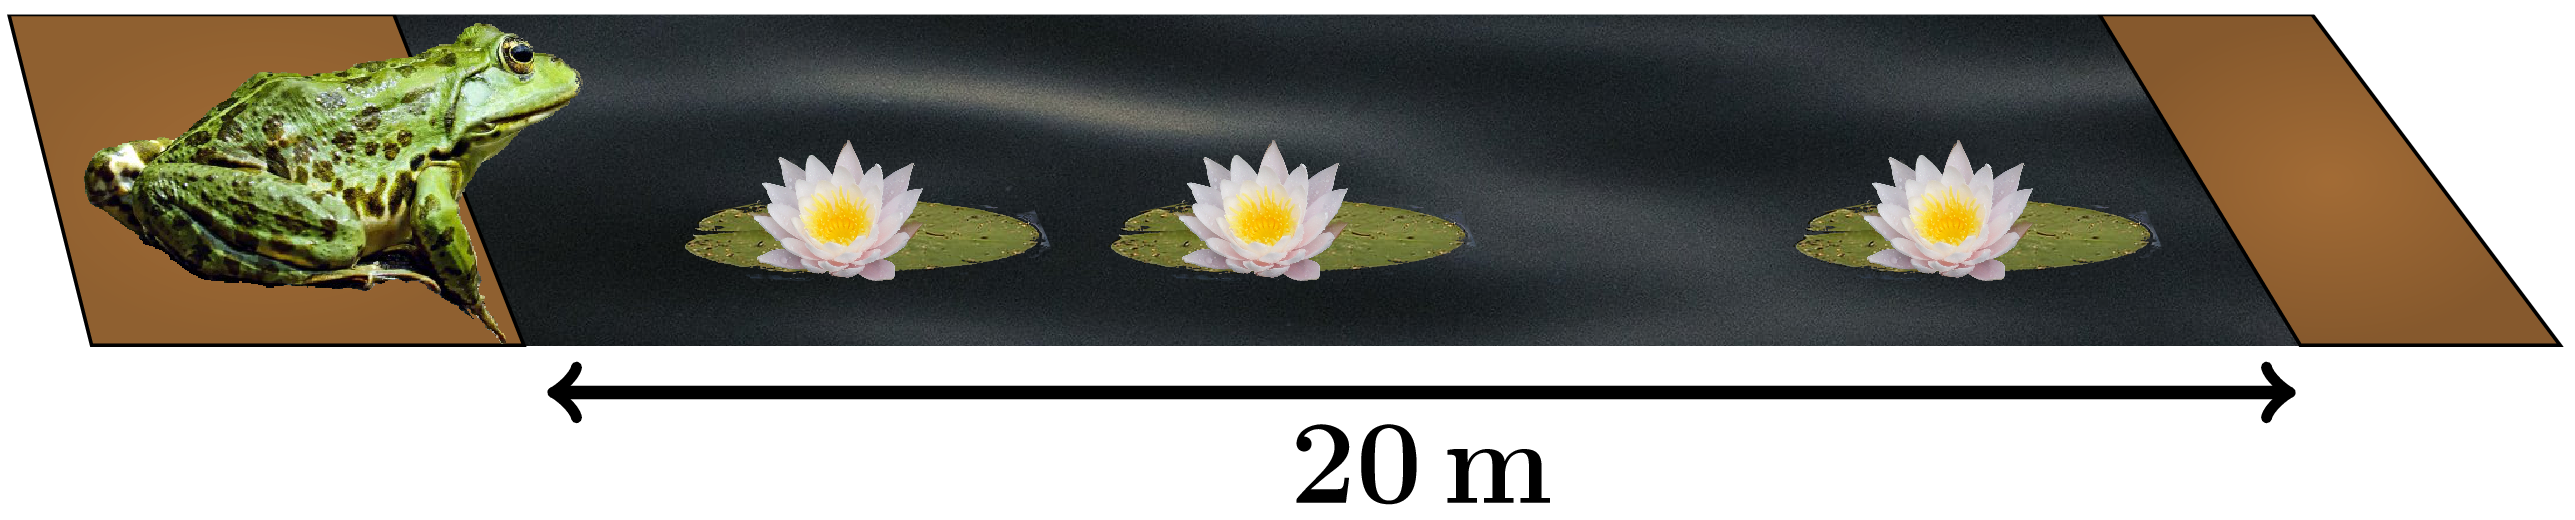

In [5]:
# Attention aux comparaisons de flottants 
# Par exemple on risque en Pyton d'avoir '(11.2+1.1>=12.3) == False'.
# On veut qu'une grenouille puisse toujours sauter sur un nénuphar à distance 1.1, et tolérera donc que la grenouille puisse sauter sur un nénuphar tant 
# nénuphar à distance très légèrement (ex: .00001) plus grande que 1.1.
def grenouille_sauteuse(l):
    """
    Entree: tableau indiquant la distance (en m) des nenuphars au point de depart (ils sont alignes). 
    Chaque nenuphar est caracterise par une distance 0<x<20, un décimal ayant au plus 2 chiffres après la virgule (représenté en Python par un flottant)
    L'arrivee est situee a 20m.
    Chaque saut doit être strictement inférieur à 1.1.
    Renvoie : le tableau des nenuphars choisis (identifies par leur distance)
    ou une erreur s'il n'y a pas de solution.
    """
    d = 0# distance_parcourue
    nenuphars = [0]+sorted(l)+[20] # petite astuce: on considere le depart et l'arrivee comme des nenuphars pour simplifier le code.
    solution = []
    i = 0
    while i < len(nenuphars)-1:
        if nenuphars[i+1] <= d + 1.1 + 0.00001:
            i = i+1
        elif d == nenuphars[i]: # pas possible de progresser depuis d
            raise Exception(f'Impossible de progresser au-dela de: {d}')
        else:
            # on a progresse mais atteint la limite pour cette etape.
            d = nenuphars[i]
            solution.append(nenuphars[i]) 
    if i == len(nenuphars)-1:
        return solution # on a atteint le dernier nenuphar = l'autre rive

# Test :
nenuphars_sans_distance_de_unvirgule1 = [1,1.3,2,3.05,4,4.1,5,5.15,6.2,7.1,8.15,9.2,10.2,11.2,12.2,13.2,14.25,15.3,16.35,17.4,18.45,19.5,20]
print(grenouille_sauteuse(nenuphars_sans_distance_de_unvirgule1)==[1,2,3.05,4.1,5.15,6.2,7.1,8.15,9.2,10.2,11.2,12.2,13.2,14.25,15.3,16.35,17.4,18.45,19.5])
nenuphars_avec_distance_de_unvirgule1 = [1,1.3,2,3.05,4,4.1,5,5.15,6.2,7.1,8.15,9.2,10.2,11.2,12.3,13.2,14.25,15.3,16.35,17.4,18.45,19.5,20]
print(grenouille_sauteuse(nenuphars_avec_distance_de_unvirgule1)==[1,2,3.05,4.1,5.15,6.2,7.1,8.15,9.2,10.2,11.2,12.3,13.2,14.25,15.3,16.35,17.4,18.45,19.5])

True
True


##  Exercice n°5 : Le gardien de musée

Un musée place des tableaux le long d’un corridor. Une liste $t$ indique la distance de chaque tableau au début du corridor (on néglige la largeur des tableaux). Chaque gardien peut surveiller un intervalle de 5m de long. Écrire et implémenter un algorithme glouton qui prend $t$ en entrée et renvoie le nombre minimal de gardiens nécessaire pour surveiller tous les tableaux. Par exemple, 2 gardiens suffisent pour $[6, 8, 12.5, 17]$.


In [ ]:
def nb_gardiens(t):
    """
    Entree: t: tableau de nombres representant la distance des tableaux au debut du couloir.
    Renvoie: le nombre de gardiens necessaires.
    Complexite: lineaire
    """
    d = 5 # distance couverte par un gardien : 5m
    tableaux = sorted(t)
    last_x = tableaux[0]
    nb = 1
    for x in tableaux:
        if last_x + d < x:
            last_x = x
            nb += 1
    return nb

# Test :
print(nb_gardiens([6,8,12.5,17])==2)

## Exercice n°6 : (approfondissement) Hill-climbing

On considère une matrice de $n\times n$ valeurs toutes distinctes. Un robot placé initialement dans la case supérieure gauche (ici, 3) peut évaluer les 4 cases voisines de la case où il se trouve. Proposer une heuristique gloutonne qui garantit que le robot aboutit à un maximum local sur la matrice sans revenir sur ses pas, (généralement assez rapidement), puis compléter le programme suivant. Ici le robot terminera sur la case 12.

![hill-climbing.png](data/hill-climbing.png)

Le robot peut sélectionner à chaque fois son voisin de valeur la plus élevée. Sur l'exemple donné (en numérotant (0,0) la case en haut à gauche, et (3,0) celle en bas à gauche...), le parcours du robot sera (0,0), (0,1), (0,2) (1,2), et finalement (1,3).

Remarque : cette heuristique est très utilisée en optimisation sous des formes un peu plus complexes : on parle alors de descente de gradient.

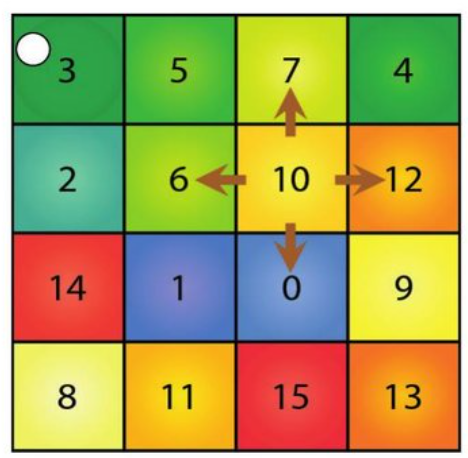

In [6]:
def voisins(pos,n):
    """
    Entrée: 
    - une paire pos=(i,j) correspondant à une position dans une matrice.
    - la "dimension" n de la matrice (la matrice a n*n cases)
    Renvoie:
    les 4 voisins de pos si elle en a 4. Elle en aura moins (2 ou 3) si elle est sur un bord
    """
    v = []
    if pos[0]>0:
        v.append((pos[0]-1,pos[1]))
    if pos[0]+1<n:
        v.append((pos[0]+1,pos[1]))
    if pos[1]>0:
        v.append((pos[0],pos[1]-1))
    if pos[1]+1<n:
        v.append((pos[0],pos[1]+1))
    return v

# Test:
print(sorted(voisins((0,0),4))==[(0, 1),(1, 0)])
print(sorted(voisins((1,0),4))==[(0, 0), (1, 1), (2, 0)])
print(sorted(voisins((2,2),4))==[(1, 2), (2, 1), (2, 3), (3, 2)])

True
True
True


In [1]:
def robot(m):
    """
    Entrée: matrice m carrée de n*n valeurs distinctes.
    ===
    On suppose naturellement que la case supérieure gauche est celle d'indice 0,0.
    On suppose que le robot est initialement placé dans la case supérieure gauche.
    ===
    Renvoie le parcours du robot jusqu'à atteindre un maximum local, en adoptant la stratégie gloutonne.
    """
    pos = (0,0)
    n = len(m)
    prochaine_pos = pos
    chemin = [pos]
    for p in voisins(pos,n):
        if m[p[0]][p[1]] > m[prochaine_pos[0]][prochaine_pos[1]]:
            prochaine_pos = p
    while pos != prochaine_pos:
        pos = prochaine_pos
        chemin.append(pos)
        for p in voisins(pos,n):
            if m[p[0]][p[1]] > m[prochaine_pos[0]][prochaine_pos[1]]:
                prochaine_pos = p
    return chemin

# Test :
m=[[1,5,7,4],[2,6,10,12],[14,1,0,9],[8,11,15,3]]
print(robot(m)==[(0,0),(0,1),(0,2),(1,2),(1,3)])

NameError: name 'voisins' is not defined